   position             team    points       won      lost      draw  \
0         1      Real Madrid  0.721754  2.238694 -2.506065 -1.431437   
1         2  Atlético Madrid -0.072958  0.778485 -1.394342 -0.822549   
2         3         Zaragoza -0.536541 -0.264522 -0.949652  0.090783   
3         4        Barcelona -0.602767 -0.055920 -0.504963 -0.822549   
4         5         Valencia -0.602767 -0.473123 -0.949652  0.395227   

     played  goals_for  goals_against  goal_difference  year  
0 -1.477619   2.641308      -1.813129         0.200178  1960  
1 -1.477619   0.593863      -1.015040         0.070195  1960  
2 -1.477619   0.401915       0.421521        -0.004196  1960  
3 -1.477619   0.913776      -0.057333         0.041060  1960  
4 -1.477619  -0.109946      -0.456377         0.012525  1960  
(160, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64
played           

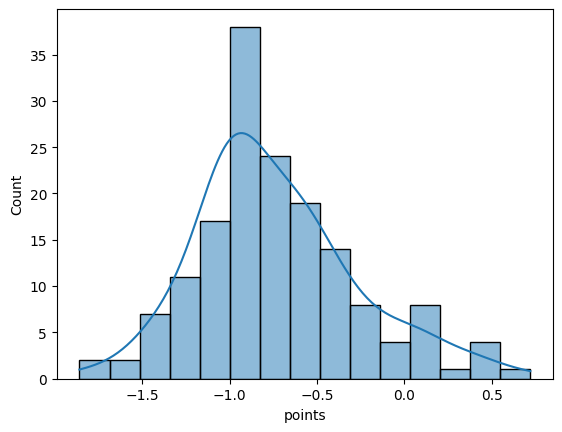

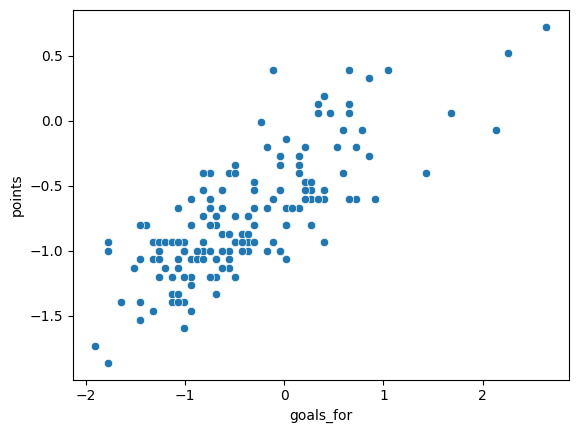

C:\Users\Sneha\AppData\Local\Temp\ipykernel_27720\4186308121.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')


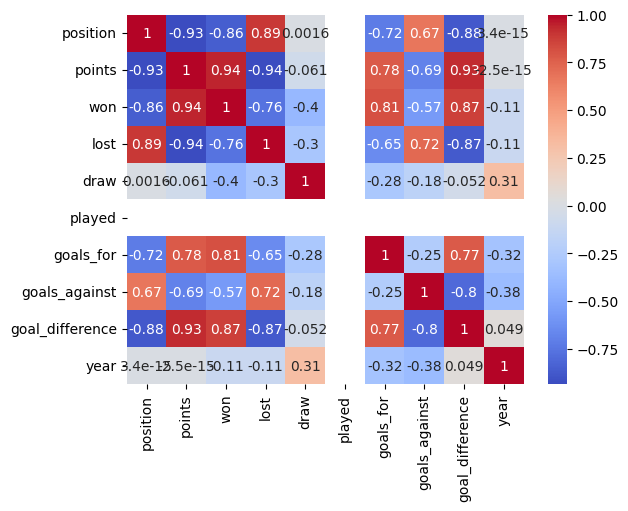

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=1960
year2=1961
while(year1!=1970):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


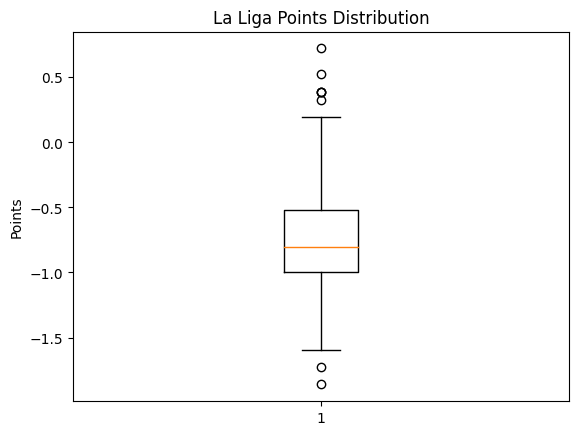

Outliers:
    position                 team    points       won      lost      draw  \
0          1          Real Madrid  0.721754  2.238694 -2.506065 -1.431437   
0          1          Real Madrid  0.523076  2.030093 -2.061375 -1.735881   
0          1          Real Madrid  0.324398  1.821491 -1.616686 -2.040326   
0          1          Real Madrid  0.390624  1.612890 -2.061375 -1.126993   
15        16  Deportivo La Coruña -1.728609 -1.516129  1.718483 -1.735881   
0          1          Real Madrid  0.390624  1.195687 -2.506065  0.090783   
0          1          Real Madrid  0.390624  0.987086 -2.728409  0.699671   
15        16           Pontevedra -1.861061 -1.933332  1.718483 -1.126993   

      played  goals_for  goals_against  goal_difference  year  
0  -1.477619   2.641308      -1.813129         0.200178  1960  
0  -1.477619   2.257412      -1.174658         0.153477  1962  
0  -1.477619   0.849794      -1.972747         0.125633  1963  
0  -1.477619   1.041742      -2.371792  

In [3]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')


plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

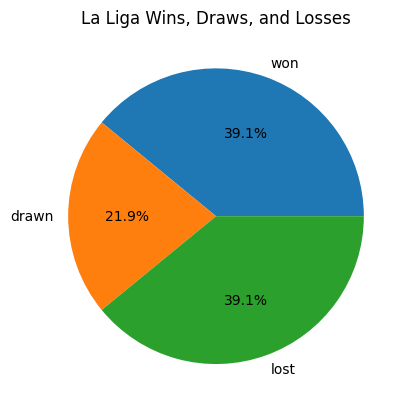

In [4]:
arr=[]
year1=1960
year2=1961
while(year1!=1970):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

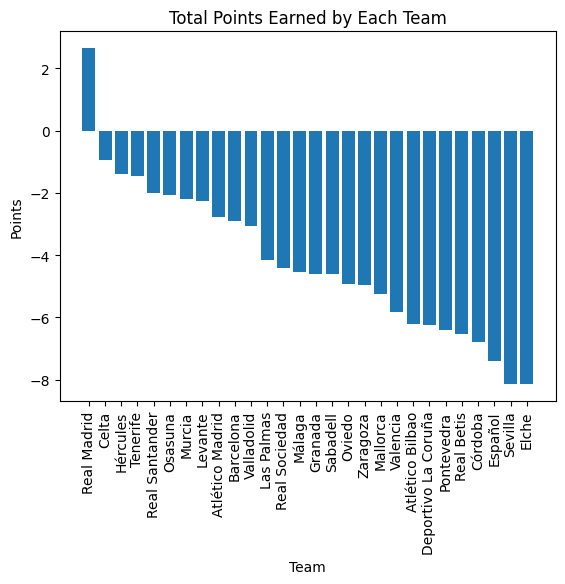

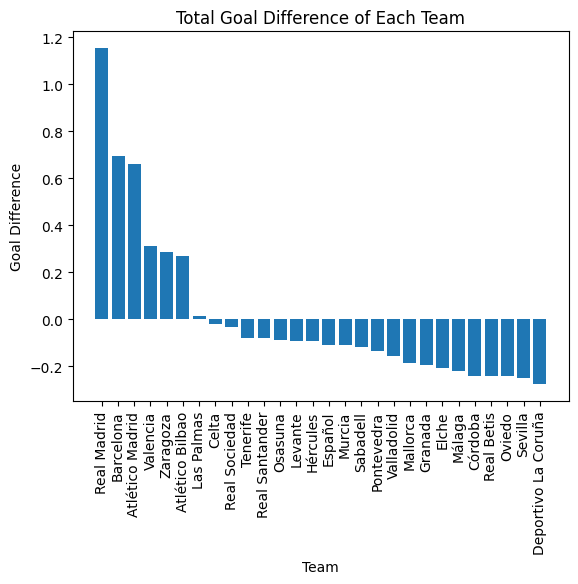

In [5]:
arr=[]
year1=1960
year2=1961
while(year1!=1970):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
df = pd.concat(data_frames)

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

# Sort the teams by goal difference
team_df = team_df.sort_values('goal_difference', ascending=False)

# Plot the bar chart of goal difference
plt.bar(team_df.index, team_df['goal_difference'])
plt.xticks(rotation=90)
plt.title('Total Goal Difference of Each Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.show()